# TP 1: Densité de medecins et dépassement d'honoraire  

* Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ?
* Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassement d'honoraires ?
* Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

## Sources de données

### INSEE

### DREES

[Portail DREES: La Direction de la recherche, des études, de l’évaluation et des statistiques](http://www.data.drees.sante.gouv.fr/ReportFolders/reportFolders.aspx?IF_ActivePath=P,490,497,514)

### Ameli.fr

## Chargement des données

### Répartition de la population par tranche d'age, par région

In [94]:
fileUrl <- "https://www.insee.fr/fr/statistiques/fichier/1893198/estim-pop-dep-sexe-gca-1975-2019.xls"
download.file(fileUrl, destfile = "estim-pop-dep-sexe-gca-1975-2019.xls", method = "curl")

In [7]:
#install.packages("readxl")
library(readxl)

In [95]:
col_names <- c('NumDepartement','Departement', 'T : 0-19', 'T : 20-39','T : 40-59','T : 60-74','T : 75-100','T Total', 'H : 0-19', 'H : 20-39','H : 40-59','H : 60-74','H : 75-100','H Total','F : 0-19', 'F : 20-39','F : 40-59','F : 60-74','F : 75-100', 'F Total')
pop_age_dep_df <- read_excel("estim-pop-dep-sexe-gca-1975-2019.xls", skip = 4, sheet = "2018", col_names = col_names)
pop_age_dep_df

NumDepartement,Departement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,H : 60-74,H : 75-100,H Total,F : 0-19,F : 20-39,F : 40-59,F : 60-74,F : 75-100,F Total
NA,NA,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total
01,Ain,167608,150063,179098,100422,51553,648744,86241,74857,89156,48588,20837,319679,81367,75206,89942,51834,30716,329065
02,Aisne,133509,116027,139509,93904,48151,531100,68383,57942,69268,45019,18006,258618,65126,58085,70241,48885,30145,272482
03,Allier,68695,62706,88612,71079,44262,335354,35378,31717,43385,33250,16871,160601,33317,30989,45227,37829,27391,174753
04,Alpes-de-Haute-Provence,34314,30298,43642,33961,20062,162277,17959,15192,21197,16628,8246,79222,16355,15106,22445,17333,11816,83055
05,Hautes-Alpes,30787,28653,38149,27779,16234,141602,16080,14365,18950,13485,6484,69364,14707,14288,19199,14294,9750,72238
06,Alpes-Maritimes,229606,238837,284044,195323,134329,1082139,117467,116638,136967,88693,51737,511502,112139,122199,147077,106630,82592,570637
07,Ardèche,72057,62279,89023,65903,37370,326632,36914,31088,44349,32018,15038,159407,35143,31191,44674,33885,22332,167225
08,Ardennes,62772,57398,73220,50155,26689,270234,32269,28724,36349,24074,10057,131473,30503,28674,36871,26081,16632,138761
09,Ariège,31595,29083,41415,31578,18940,152611,16331,15043,20370,15630,7631,75005,15264,14040,21045,15948,11309,77606


### Données d'honoraires totaux par département

In [9]:
fileUrl <- "https://www.ameli.fr/fileadmin/user_upload/documents/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls"
download.file(fileUrl, destfile = "Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls", method = "curl")

In [10]:
honoraires_data <- read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls", sheet = "Spécialistes")
honoraires_data

Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.3300000001,2496180.4499999997,0,7026259.7800000003
02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4985259.6200000001,373837.57000000001,0,5359097.1900000004
02- Anesthésie-réanimation chirurgicale,03- Allier,19,5102901.7000000002,560978.58999999997,0,5663880.29
02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,nc,nc,nc,nc
02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,nc,nc,nc,nc
02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,24853773.209999993,10816346.67,0,35670119.879999995
02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5271245.3000000007,802542.01000000001,0,6073787.3100000005
02- Anesthésie-réanimation chirurgicale,08- Ardennes,6,nc,nc,nc,nc
02- Anesthésie-réanimation chirurgicale,09- Ariège,0,0,0,0,0
02- Anesthésie-réanimation chirurgicale,10- Aube,12,3693624.7800000003,9543.9200000000001,0,3703168.7000000002


## Questions

### Quelle spécialité a eu le plus de dépassement d'honoraires ?

In [11]:
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [22]:
honoraires_data %>% 
    filter(!grepl("TOTAL",DEPARTEMENT)) %>% # Filter les lignes totals départements

    # Renommer les colonnes 'Spécialistes' et 'DEPASSEMENTS (Euros)'
    rename(SPECIALISTES='Spécialistes', DEPASSEMENTS_EUROS = 'DEPASSEMENTS (Euros)') %>% 

    # Convertir le dépassement en numeric en introduisant des NA ou c'est pas renseigné
    mutate(DEPASSEMENTS_EUROS = as.numeric(DEPASSEMENTS_EUROS)) %>%

    select(SPECIALISTES, DEPASSEMENTS_EUROS) %>% # Garder que les colonnes qui nous intéresse 
    filter(!grepl("TOTAL MEDECINS|SPECIALISTES",SPECIALISTES)) %>% # Supprimer les lignes total par médécins
    filter(grepl("TOTAL",SPECIALISTES)) %>% # Supprimer les lignes total par médécins

    group_by(SPECIALISTES) %>% # Grouper par spécialité 
    summarize(DEPASSEMENTS_SUM_EUROS = sum(DEPASSEMENTS_EUROS, na.rm = TRUE)) %>% # Calculer la somme

    arrange(desc(DEPASSEMENTS_SUM_EUROS)) %>%
    head(10)

Warning message in evalq(as.numeric(DEPASSEMENTS_EUROS), <environment>):
“NAs introduced by coercion”

SPECIALISTES,DEPASSEMENTS_SUM_EUROS
"TOTAL GYNECOLOGIE (70, 77, 79, 07)",312102435
"TOTAL ANESTHESIE REANIMATION (02, 20)",263943325
"TOTAL CHIRURGIE (43, 44, 46, 47, 48, 49, 04)",258270946
"TOTAL RADIOLOGIE (72, 74, 76, 06)",192948931
"TOTAL PSYCHIATRIE (75, 33)",130902096
"TOTAL STOMATOLOGIE (45, 18)",80485381
"TOTAL PEDIATRIE (78, 12)",65229907
"TOTAL MEDECINE INTERNE (71, 73, 09)",10134198


### Quelle relation entre le dépassement d'honoraires et le département/région ?

In [23]:
honoraires_data %>% 
    filter(!grepl("TOTAL",DEPARTEMENT)) %>% # Filter les lignes totals départements
    mutate(DEPARTEMENT = as.integer(str_extract(DEPARTEMENT, "(\\d+)"))) %>% # garder que le code du département

    # Renommer les colonnes 'Spécialistes' et 'DEPASSEMENTS (Euros)'
    rename(SPECIALISTES='Spécialistes', DEPASSEMENTS_EUROS = 'DEPASSEMENTS (Euros)') %>%

    # Convertir le dépassement en numeric en introduisant des NA ou c'est pas renseigné
    mutate(DEPASSEMENTS_EUROS = as.numeric(DEPASSEMENTS_EUROS)) %>% # 

    select(SPECIALISTES, DEPARTEMENT, DEPASSEMENTS_EUROS) %>%
    filter(!grepl("TOTAL",SPECIALISTES)) %>%

    group_by(DEPARTEMENT) %>% # Grouper par département
    summarize(DEPASSEMENTS_SUM_EUROS = sum(DEPASSEMENTS_EUROS, na.rm = TRUE)) %>%

    arrange(desc(DEPASSEMENTS_SUM_EUROS)) %>%
    head(5)



Warning message in evalq(as.numeric(DEPASSEMENTS_EUROS), <environment>):
“NAs introduced by coercion”

DEPARTEMENT,DEPASSEMENTS_SUM_EUROS
75,554728887
69,201644694
92,152813197
78,96300154
6,85122297


### Est-ce qu'il y a une relation entre la densité des medecins et le dépassement d'honoraire par individu ?

In [45]:
honoraires_dept_df <- 
  honoraires_data %>% 
    filter(!grepl("TOTAL",DEPARTEMENT)) %>% # Filter les lignes totals départements
    mutate(DEPARTEMENT = as.integer(str_extract(DEPARTEMENT, "(\\d+)"))) %>% # garder que le code du département

    # Renommer les colonnes 'Spécialistes' et 'DEPASSEMENTS (Euros)'
    rename(SPECIALISTES='Spécialistes', DEPASSEMENTS_EUROS = 'DEPASSEMENTS (Euros)', HONORAIRES_SANS_DEPASSEMENT='HONORAIRES SANS DEPASSEMENT (Euros)') %>%

    # Convertir le dépassement en numeric en introduisant des NA ou c'est pas renseigné
    mutate(DEPASSEMENTS_EUROS = as.numeric(DEPASSEMENTS_EUROS)) %>% # 
    mutate(HONORAIRES_SANS_DEPASSEMENT = as.numeric(HONORAIRES_SANS_DEPASSEMENT)) %>% # 

    select(SPECIALISTES, DEPARTEMENT, DEPASSEMENTS_EUROS, HONORAIRES_SANS_DEPASSEMENT, EFFECTIFS) %>%
    filter(!grepl("TOTAL",SPECIALISTES)) %>%

    group_by(DEPARTEMENT) %>% # Grouper par département
    summarize(DEPASSEMENTS_SUM_EUROS = sum(DEPASSEMENTS_EUROS, na.rm = TRUE), 
              EFFECTIFS_SUM = sum(EFFECTIFS, na.rm = TRUE), HONORAIRES_SANS_DEPASSEMENT_SUM=sum(HONORAIRES_SANS_DEPASSEMENT, na.rm = TRUE))

head(honoraires_dept_df)
nrow(honoraires_dept_df)

Warning message in evalq(as.numeric(DEPASSEMENTS_EUROS), <environment>):
“NAs introduced by coercion”Warning message in evalq(as.numeric(HONORAIRES_SANS_DEPASSEMENT), <environment>):
“NAs introduced by coercion”

DEPARTEMENT,DEPASSEMENTS_SUM_EUROS,EFFECTIFS_SUM,HONORAIRES_SANS_DEPASSEMENT_SUM
1,10720493.41,243,46550261
2,7270228.93,581,99636585
3,4082129.59,224,38272518
4,1715.47,105,2631348
5,221777.88,110,3889248
6,85122296.61,1636,308471273


[1] 99

In [58]:
dense_pop_df = pop_age_dep_df %>%
    rename(T_TOTAL="T Total", DEPARTEMENT = "NumDepartement") %>%
    mutate(DEPARTEMENT = as.numeric(DEPARTEMENT)) %>%
    mutate(T_TOTAL = as.numeric(T_TOTAL)) %>%
    filter(!is.na(DEPARTEMENT)) %>%
    select(DEPARTEMENT, T_TOTAL)
head(arrange(dense_pop_df, desc(T_TOTAL)))

Warning message in evalq(as.numeric(DEPARTEMENT), <environment>):
“NAs introduced by coercion”Warning message in evalq(as.numeric(T_TOTAL), <environment>):
“NAs introduced by coercion”

DEPARTEMENT,T_TOTAL
59,2597774
75,2157184
13,2030464
69,1867275
93,1638931
92,1605502


In [59]:
honoraires_dept_pop_df <- left_join(honoraires_dept_df, dense_pop_df)
head(honoraires_dept_pop_df)
nrow(honoraires_dept_pop_df)

Joining, by = "DEPARTEMENT"


DEPARTEMENT,DEPASSEMENTS_SUM_EUROS,EFFECTIFS_SUM,HONORAIRES_SANS_DEPASSEMENT_SUM,T_TOTAL
1,10720493.41,243,46550261,648744
2,7270228.93,581,99636585,531100
3,4082129.59,224,38272518,335354
4,1715.47,105,2631348,162277
5,221777.88,110,3889248,141602
6,85122296.61,1636,308471273,1082139


[1] 99

In [83]:
honoraires_dept_pop_df <- honoraires_dept_pop_df %>%
    mutate(DENSITE_MEDECIN=EFFECTIFS_SUM/T_TOTAL*1000) %>%
    mutate(DEPACEMENT_INDIVIDU=DEPASSEMENTS_SUM_EUROS/T_TOTAL) %>%
    mutate(HONORAIRES_SANS_DEPASSEMENT_INDIVIDU=HONORAIRES_SANS_DEPASSEMENT_SUM/T_TOTAL)
head(honoraires_dept_pop_df)

DEPARTEMENT,DEPASSEMENTS_SUM_EUROS,EFFECTIFS_SUM,HONORAIRES_SANS_DEPASSEMENT_SUM,T_TOTAL,DENSITE_MEDECIN,DEPACEMENT_INDIVIDU,HONORAIRES_SANS_DEPASSEMENT_INDIVIDU
1,10720493.41,243,46550261,648744,0.3745699,16.52499817,71.75444
2,7270228.93,581,99636585,531100,1.0939559,13.68900194,187.60419
3,4082129.59,224,38272518,335354,0.6679509,12.17259848,114.12572
4,1715.47,105,2631348,162277,0.6470418,0.01057125,16.21516
5,221777.88,110,3889248,141602,0.7768252,1.56620584,27.46605
6,85122296.61,1636,308471273,1082139,1.5118206,78.66114853,285.05698


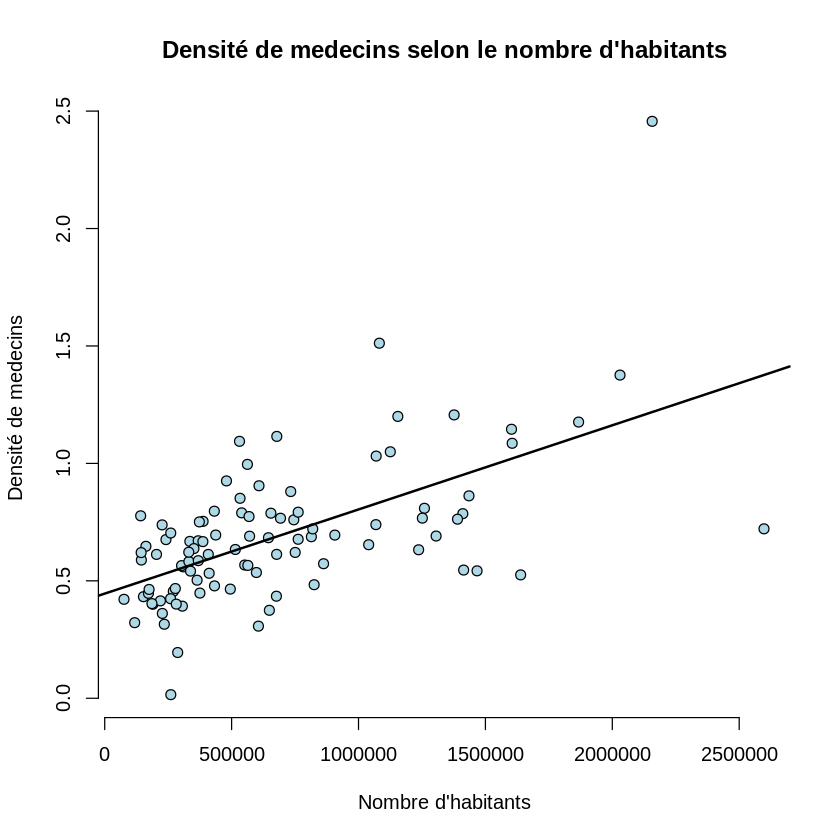

In [85]:
plot(honoraires_dept_pop_df$T_TOTAL, honoraires_dept_pop_df$DENSITE_MEDECIN,  
     xlab = "Nombre d'habitants", 
     ylab = "Densité de medecins",
     bg = "lightblue", 
     col = "black", cex = 1.1, pch = 21,frame = FALSE)
abline(lm(DENSITE_MEDECIN ~ T_TOTAL, data = honoraires_dept_pop_df), lwd = 2)
title("Densité de medecins selon le nombre d'habitants")

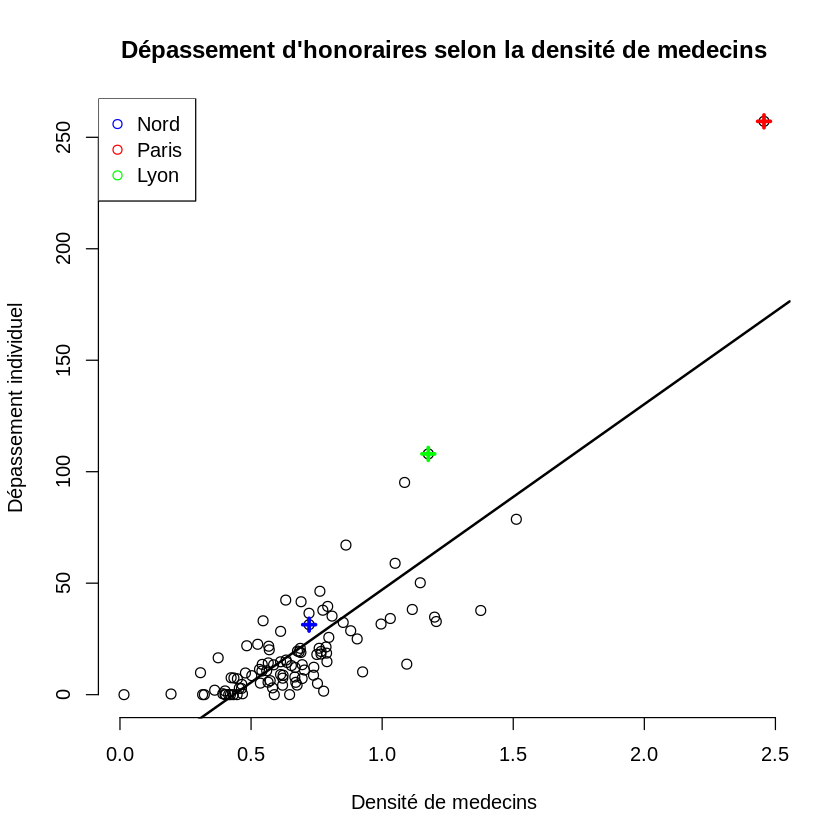

In [93]:
plot(honoraires_dept_pop_df$DENSITE_MEDECIN, honoraires_dept_pop_df$DEPACEMENT_INDIVIDU,  
     xlab = "Densité de medecins", 
     ylab = "Dépassement individuel",
     bg = "lightblue", 
     col = "black", cex = 1.1, frame = FALSE)
abline(lm(DEPACEMENT_INDIVIDU ~ DENSITE_MEDECIN, data = honoraires_dept_pop_df), lwd = 2)

with(subset(honoraires_dept_pop_df, DEPARTEMENT == 59), points(DENSITE_MEDECIN, DEPACEMENT_INDIVIDU, lwd=3, pch=3, col = "blue"))
with(subset(honoraires_dept_pop_df, DEPARTEMENT == 75), points(DENSITE_MEDECIN, DEPACEMENT_INDIVIDU, lwd=3, pch=3, col = "red"))
with(subset(honoraires_dept_pop_df, DEPARTEMENT == 69), points(DENSITE_MEDECIN, DEPACEMENT_INDIVIDU, lwd=3, pch=3, col = "green"))
legend("topleft", pch = 1, col = c("blue", "red", "green"), legend = c("Nord", "Paris", "Lyon"))
title("Dépassement d'honoraires selon la densité de medecins")


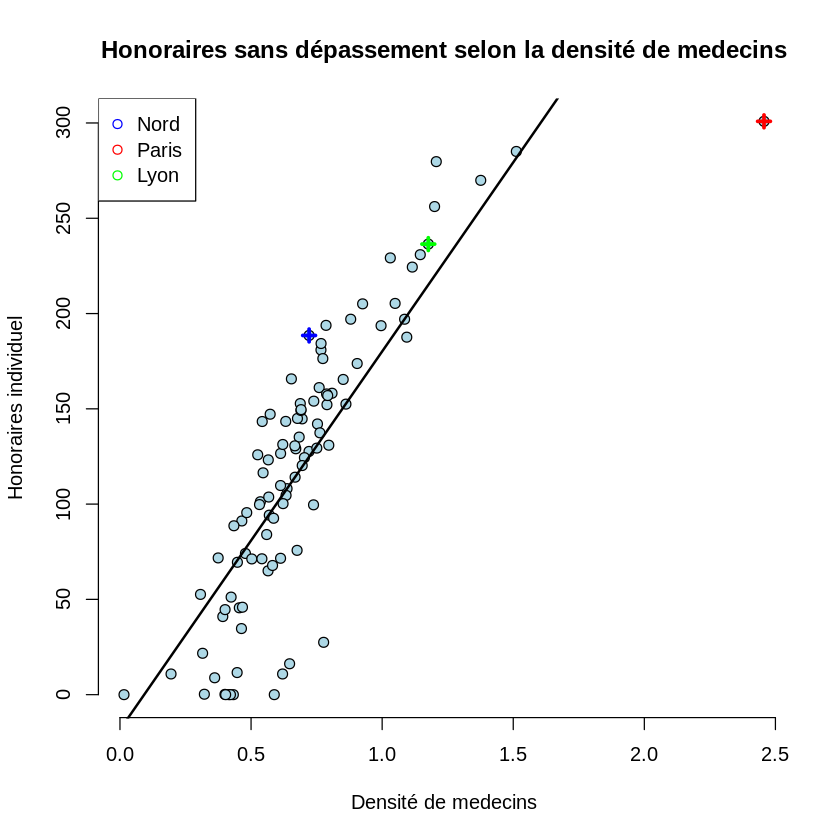

In [89]:
plot(honoraires_dept_pop_df$DENSITE_MEDECIN, honoraires_dept_pop_df$HONORAIRES_SANS_DEPASSEMENT_INDIVIDU,  
     xlab = "Densité de medecins", 
     ylab = "Honoraires individuel", 
     bg = "lightblue", 
     col = "black", cex = 1.1, pch = 21,frame = FALSE)
abline(lm(HONORAIRES_SANS_DEPASSEMENT_INDIVIDU ~ DENSITE_MEDECIN, data = honoraires_dept_pop_df), lwd = 2)

with(subset(honoraires_dept_pop_df, DEPARTEMENT == 59), points(DENSITE_MEDECIN, HONORAIRES_SANS_DEPASSEMENT_INDIVIDU, lwd=3, pch=3, col = "blue"))
with(subset(honoraires_dept_pop_df, DEPARTEMENT == 75), points(DENSITE_MEDECIN, HONORAIRES_SANS_DEPASSEMENT_INDIVIDU, lwd=3, pch=3, col = "red"))
with(subset(honoraires_dept_pop_df, DEPARTEMENT == 69), points(DENSITE_MEDECIN, HONORAIRES_SANS_DEPASSEMENT_INDIVIDU, lwd=3, pch=3, col = "green"))
legend("topleft", pch = 1, col = c("blue", "red", "green"), legend = c("Nord", "Paris", "Lyon"))
title("Honoraires sans dépassement selon la densité de medecins")
